In [14]:
import pandas as pd
import csv
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
df=pd.read_csv('Market_Basket_Optimisation (1).csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import seaborn as sns


In [17]:
dataset=[]

In [18]:

  with open('Market_Basket_Optimisation (1).csv') as file:
    reader=csv.reader(file,delimiter=',')
    for row in reader:
      dataset.append(row)

In [19]:
all_items=[]
for row in dataset:
    for item in row:
        all_items.append(item)
        

In [ ]:
item_counts = Counter(all_items)
df_items = pd.DataFrame(item_counts.items(), columns=['Item', 'Count'])
df_items = df_items.sort_values(by='Count', ascending=False)

In [ ]:
dataset[0:10]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

In [9]:
sns.countplot(x=dataset[[0:20]])

SyntaxError: invalid syntax (127623030.py, line 1)

In [11]:
te=TransactionEncoder()
x=te.fit_transform(dataset)

In [15]:
len(te.columns_)

120

In [13]:
df=pd.DataFrame(x,columns=te.columns_)

In [14]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [16]:
df.columns

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=120)

In [18]:
#find frequent items
freq_items=apriori(df,min_support=0.01,use_colnames=True)
freq_items

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(mineral water, milk, spaghetti)"
255,0.010265,"(mineral water, olive oil, spaghetti)"


In [19]:
# find rules
rules=association_rules(freq_items,metric='confidence',min_threshold=0.25)

In [20]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,1.0,0.007096,1.108844,0.353384,0.093168,0.098160,0.190499
3,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,1.0,0.003614,1.057552,0.162275,0.081009,0.054420,0.191083
4,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,1.0,0.007278,1.368879,0.479672,0.060950,0.269475,0.254802
91,"(mineral water, olive oil)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,1.0,0.005460,1.315071,0.547034,0.053621,0.239585,0.215470
92,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,1.0,0.004799,1.378954,0.478514,0.040892,0.274813,0.245370
93,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,1.0,0.005593,1.251198,0.504819,0.058384,0.200766,0.202885


In [22]:
rules=rules[['antecedents','consequents','support','confidence']]
rules.head()

,antecedents,consequents,support,confidence
0,(avocado),(mineral water),0.011598,0.348000
1,(burgers),(eggs),0.028796,0.330275
2,(burgers),(french fries),0.021997,0.252294
3,(burgers),(mineral water),0.024397,0.279817
4,(cake),(mineral water),0.027463,0.338816


In [32]:
rules[rules['antecedents']=={'olive oil'}]

,antecedents,consequents,support,confidence
32,(olive oil),(milk),0.017064,0.259109
35,(olive oil),(mineral water),0.027596,0.419028
46,(olive oil),(spaghetti),0.022930,0.348178


In [34]:
rules[rules['antecedents']=={'mineral water'}]

,antecedents,consequents,support,confidence
41,(mineral water),(spaghetti),0.059725,0.250559


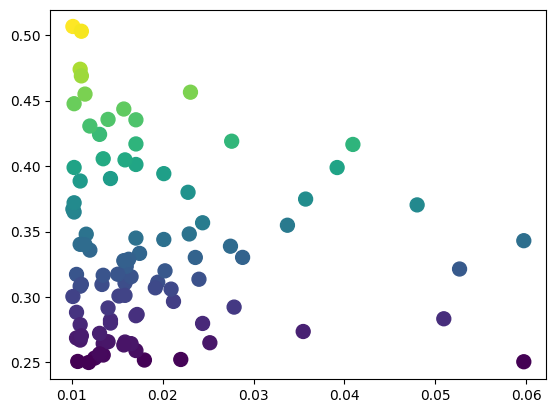

In [44]:

import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], c=rules['confidence'],  s=100)
